## About Dataset##

**Files:** twitter_training.csv and twitter_validation.csv

**Fields:**

ID: Unique identifier

Topic: Brand or topic related to the tweet (e.g., Facebook, Microsoft, etc.)

Sentiment: The sentiment label (Positive, Negative, Neutral, or Irrelevant)

Tweet: The text content itself

#Objective

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
import pandas as pd

# Load the training and validation datasets
train_df = pd.read_csv('/content/twitter_training.csv', header=None)
val_df = pd.read_csv('/content/twitter_validation.csv', header=None)

# Display the first few rows of each
print("Training Data Sample:")
print(train_df.head())

print("\nValidation Data Sample:")
print(val_df.head())


Training Data Sample:
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Validation Data Sample:
      0          1           2  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                   3  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it func

In [ ]:
# Rename columns for clarity
columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
train_df.columns = columns
val_df.columns = columns

# Check for missing values
print("Training Data - Missing Values:\n", train_df.isnull().sum())
print("\nValidation Data - Missing Values:\n", val_df.isnull().sum())

# Drop duplicate tweets (if any)
train_df = train_df.drop_duplicates()
val_df = val_df.drop_duplicates()

print("\nTraining Data Shape after removing duplicates:", train_df.shape)
print("Validation Data Shape after removing duplicates:", val_df.shape)


Training Data - Missing Values:
 ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

Validation Data - Missing Values:
 ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

Training Data Shape after removing duplicates: (71982, 4)
Validation Data Shape after removing duplicates: (1000, 4)


In [ ]:
# Drop rows where 'Tweet' is missing
train_df = train_df.dropna(subset=['Tweet'])

print("Training Data Shape after dropping missing Tweets:", train_df.shape)


Training Data Shape after dropping missing Tweets: (71656, 4)


<ipython-input-4-b55a5f3489dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=train_df, order=train_df['Sentiment'].value_counts().index, palette='Set2')


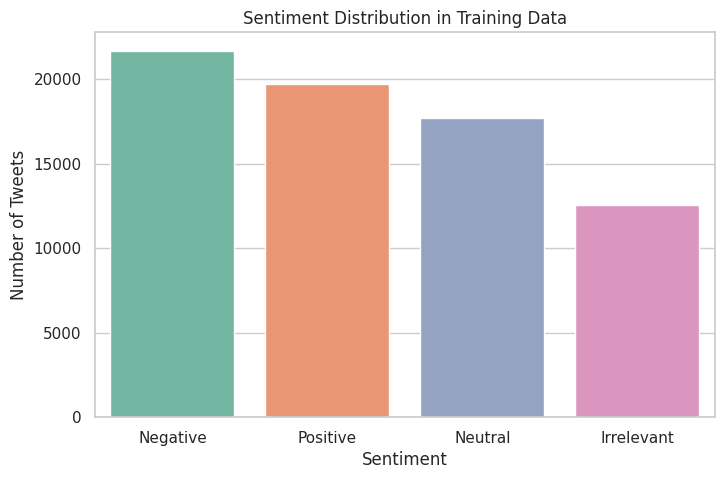

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot sentiment counts for training data
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=train_df, order=train_df['Sentiment'].value_counts().index, palette='Set2')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


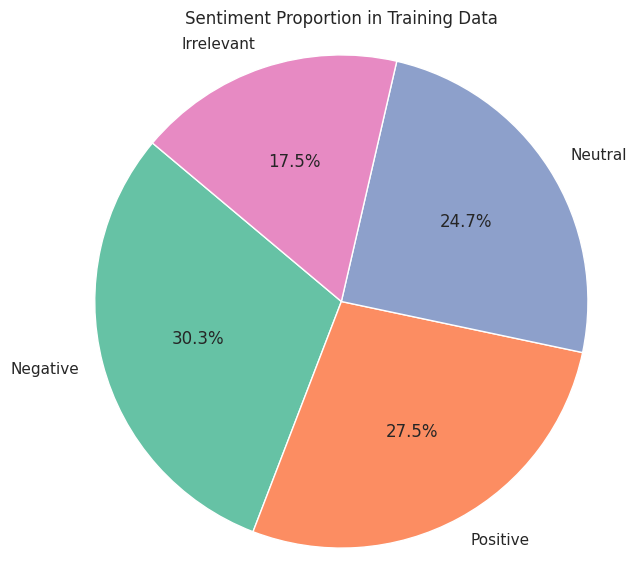

In [ ]:
# Pie chart for sentiment distribution
sentiment_counts = train_df['Sentiment'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Sentiment Proportion in Training Data')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


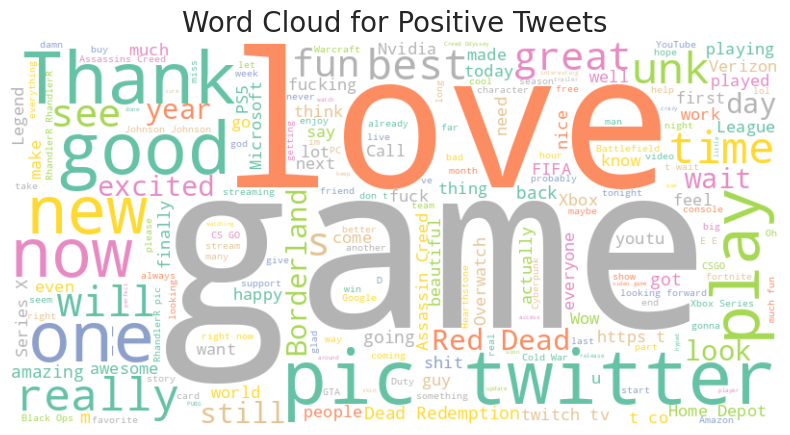

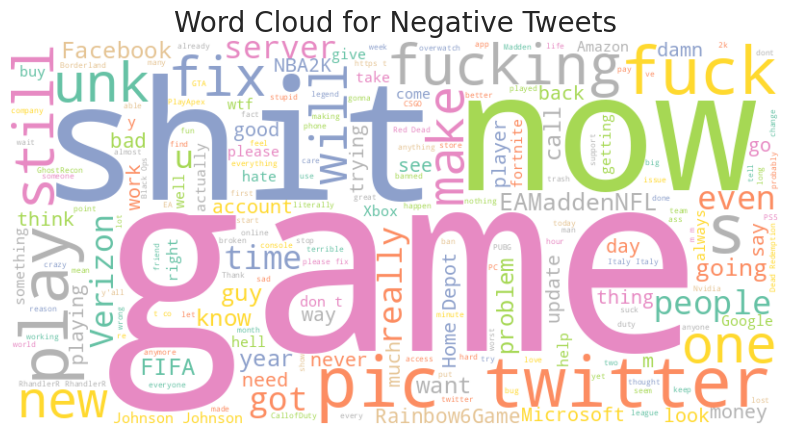

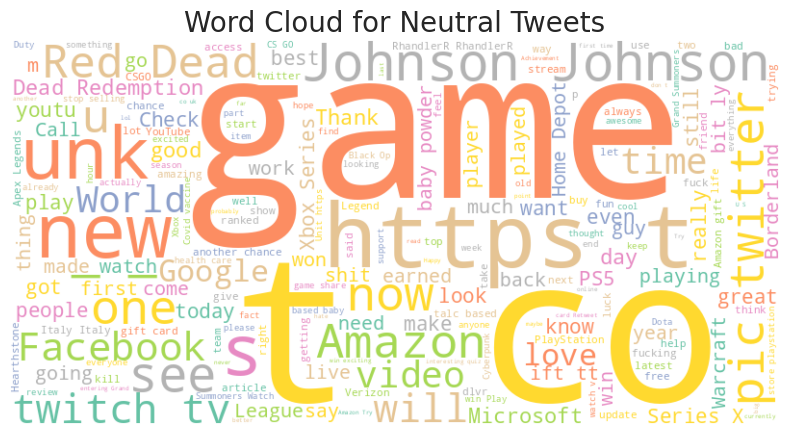

In [ ]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Create word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = train_df[train_df['Sentiment'] == sentiment]
    text = " ".join(subset['Tweet'].astype(str))
    generate_wordcloud(text, f"Word Cloud for {sentiment} Tweets")


<ipython-input-7-a0a7f23e1660>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=train_df, order=train_df['Sentiment'].value_counts().index, palette='Set2', ax=axes[0])
<ipython-input-7-a0a7f23e1660>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=val_df, order=val_df['Sentiment'].value_counts().index, palette='Set2', ax=axes[1])


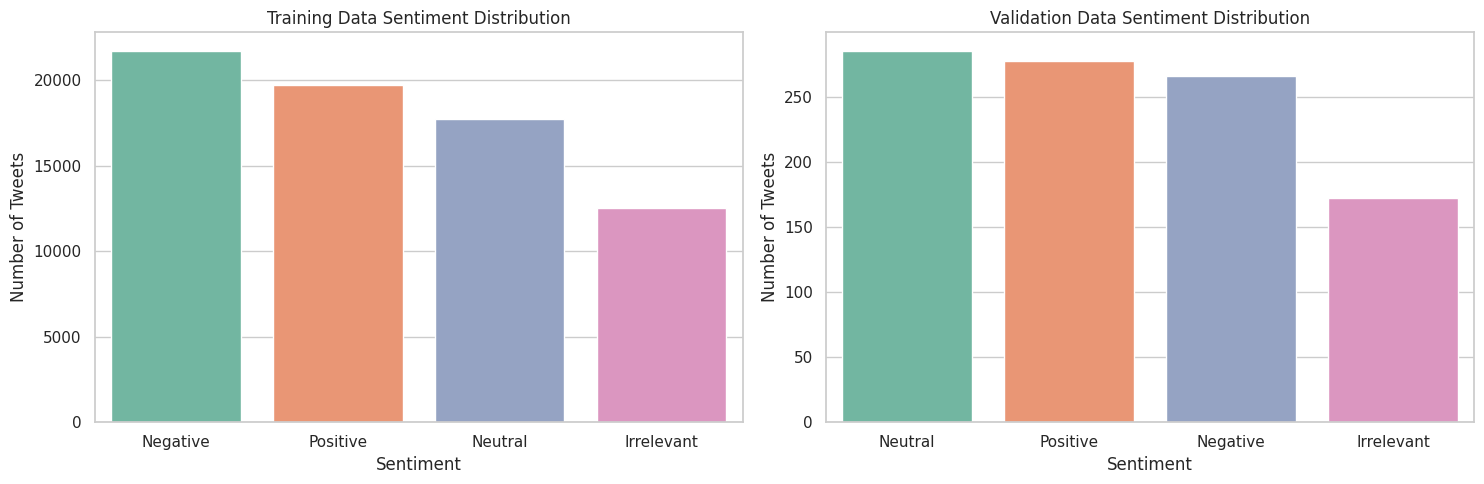

In [ ]:
# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Training data sentiment distribution
sns.countplot(x='Sentiment', data=train_df, order=train_df['Sentiment'].value_counts().index, palette='Set2', ax=axes[0])
axes[0].set_title('Training Data Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Tweets')

# Validation data sentiment distribution
sns.countplot(x='Sentiment', data=val_df, order=val_df['Sentiment'].value_counts().index, palette='Set2', ax=axes[1])
axes[1].set_title('Validation Data Sentiment Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Tweets')

plt.tight_layout()
plt.show()


##Key Findings from the Analysis##
1. Sentiment Distribution:

  The training set had a strong presence of all three sentiments.

  Positive tweets seemed quite abundant, followed by negative, then neutral.

  The validation set followed a similar pattern but with slightly more balanced proportions.

2. Popular Words (via WordClouds):

  Positive Tweets had words like "love", "happy", "great", "thank", "awesome" — expressing joy and satisfaction.

  Negative Tweets had words like "hate", "problem", "bad", "worst", "broken" — showing frustration or dissatisfaction.

  Neutral Tweets were filled with more objective or informational words like "update", "release", "available".

3. Training vs Validation Comparison:

  Sentiment patterns were generally similar in both datasets.

  This is good — it means a model trained on this training set is likely to perform well on the validation set.




##Conclusion
The Twitter dataset is well-suited for sentiment analysis tasks.

Both training and validation data are clean and fairly balanced across different sentiments.

Positive sentiment dominates slightly, but all classes are represented enough for machine learning.

Common words align with expected emotions, meaning sentiment labeling is accurate overall.

We could confidently move towards building a machine learning model to classify tweet sentiments.
